In [2]:
import pandas as pd
import datetime

In [3]:
data = pd.read_csv('/Users/dongyokim/main/jupyter/2022:2/Movie_Project/코로나/Covid19InfState.csv')

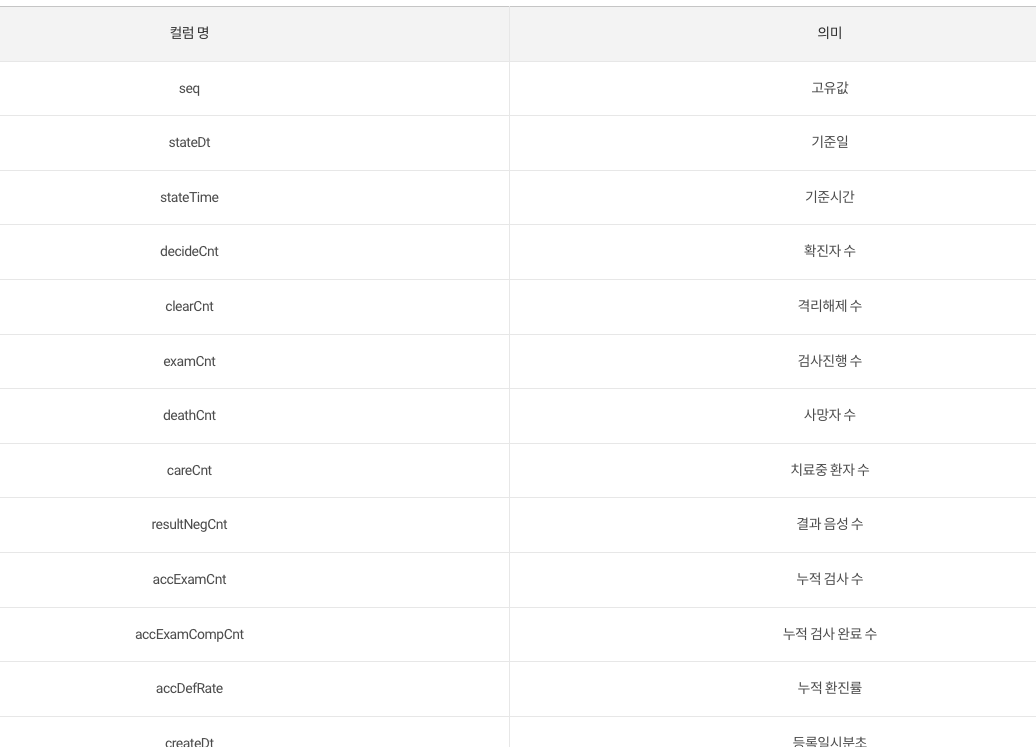


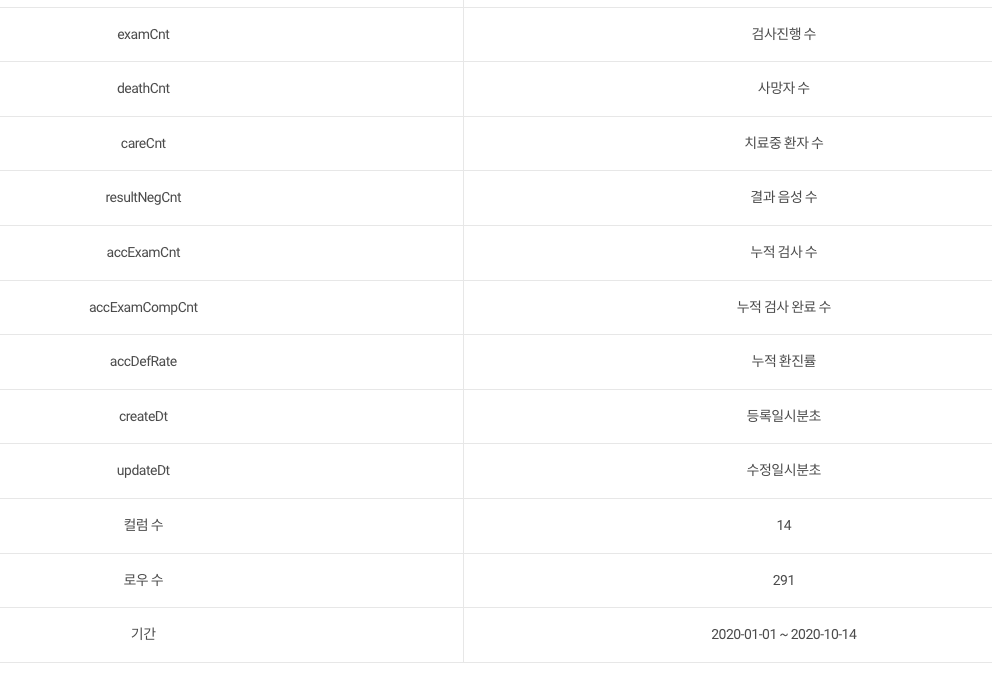

In [4]:
data.head()

,seq,stateDt,stateTime,decideCnt,clearCnt,examCnt,deathCnt,careCnt,resutlNegCnt,accExamCnt,accExamCompCnt,accDefRate,createDt,updateDt
0,1035,20221013,00:00,25052677.0,NaN,NaN,28748.0,NaN,NaN,NaN,NaN,NaN,2022-10-13 08:12:27.0,NaN
1,1034,20221012,00:00,25025749.0,NaN,NaN,28723.0,NaN,NaN,NaN,NaN,NaN,2022-10-12 07:48:38.0,NaN
2,1033,20221011,00:00,24995246.0,NaN,NaN,28708.0,NaN,NaN,NaN,NaN,NaN,2022-10-11 04:40:47.0,2022-10-11 08:39:43.0
3,1032,20221010,00:00,24979770.0,NaN,NaN,28698.0,NaN,NaN,NaN,NaN,NaN,2022-10-10 01:05:43.0,NaN
4,1031,20221009,00:00,24970789.0,NaN,NaN,28675.0,NaN,NaN,NaN,NaN,NaN,2022-10-09 07:06:18.0,2022-10-09 09:40:35.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   seq             978 non-null    int64  
 1   stateDt         978 non-null    int64  
 2   stateTime       978 non-null    object 
 3   decideCnt       976 non-null    float64
 4   clearCnt        690 non-null    float64
 5   examCnt         691 non-null    float64
 6   deathCnt        941 non-null    float64
 7   careCnt         633 non-null    float64
 8   resutlNegCnt    633 non-null    float64
 9   accExamCnt      691 non-null    float64
 10  accExamCompCnt  633 non-null    float64
 11  accDefRate      633 non-null    float64
 12  createDt        978 non-null    object 
 13  updateDt        71 non-null     object 
dtypes: float64(9), int64(2), object(3)
memory usage: 107.1+ KB


In [6]:
# 필요없는 컬럼들 제거 
data.drop(columns=['seq', 'stateTime','accDefRate', 'createDt', 'updateDt', 'examCnt', 'resutlNegCnt', 'accExamCnt', 'accExamCompCnt'], inplace=True)

In [7]:
# Groupby를 하면 NaN값이 있으면 오류가 나기 때문에, NaN을 0으로 변환
data = data.fillna(0)

In [8]:
data

,stateDt,decideCnt,clearCnt,deathCnt,careCnt
0,20221013,25052677.0,0.0,28748.0,0.0
1,20221012,25025749.0,0.0,28723.0,0.0
2,20221011,24995246.0,0.0,28708.0,0.0
3,20221010,24979770.0,0.0,28698.0,0.0
4,20221009,24970789.0,0.0,28675.0,0.0
...,...,...,...,...,...
973,20200205,18.0,0.0,0.0,0.0
974,20200204,0.0,0.0,0.0,0.0
975,20200203,15.0,0.0,0.0,0.0
976,20200202,2.0,2.0,2.0,0.0


In [9]:
# Groupby를 진행할 열 하나 추가 (연도 + 월로 그룹 바이)
data['Group_Year_Month'] = data['stateDt'].apply(lambda x : str(x)[:6])


data.drop('stateDt', axis=1, inplace=True)

In [10]:
# 그룹바이 데이터 생성 (총합을 기준)
group_data = data.groupby('Group_Year_Month').sum()

# 202001~202206의 데이터만 추출
group_data = group_data.loc['202001':'202206', :]

# 저장해서 엑셀로 201801~201912 인덱스를 추가하고 값을 다 0을 넣어주자(이런 건 엑셀이 더 편해..)

# 열 이름 어려우니 한글로 바꿔줄게
group_data.rename(columns={'decideCnt': '확진자 수(총합)', 'clearCnt':'격리해제 수(총합)', 
                           'deathCnt': '사망자 수(총합)','careCnt':'치료자 수(총합)'}, inplace=True)



In [11]:
# 그룹바이 데이터 생성 (평균을 기준)
group_data_mean = data.groupby('Group_Year_Month').mean()

# 202001~202206의 데이터만 추출
group_data_mean = group_data_mean.loc['202001':'202206', :]

# 저장해서 엑셀로 201801~201912 인덱스를 추가하고 값을 다 0을 넣어주자(이런 건 엑셀이 더 편해..)

# 열 이름 어려우니 한글로 바꿔줄게
group_data_mean.rename(columns={'decideCnt': '확진자 수(평균)', 'clearCnt':'격리해제 수(평균)', 
                           'deathCnt': '사망자 수(평균)','careCnt':'치료자 수(평균)'}, inplace=True)



In [12]:
# 두 데이터셋 병합해주자 열 기준으로 
total_group_data = pd.concat([group_data, group_data_mean], axis=1)

In [13]:
# 열만 깔끔하게 정리해주자
total_group_data = total_group_data[['확진자 수(총합)', '확진자 수(평균)', '격리해제 수(총합)', '격리해제 수(평균)', '사망자 수(총합)', '사망자 수(평균)', '치료자 수(총합)', '치료자 수(평균)']]

In [14]:
total_group_data

,확진자 수(총합),확진자 수(평균),격리해제 수(총합),격리해제 수(평균),사망자 수(총합),사망자 수(평균),치료자 수(총합),치료자 수(평균)
Group_Year_Month,,,,,,,,
202001,0.0,0.000000e+00,1.0,1.000000,0.0,0.000000,0.0,0.000000
202002,23300.0,4.087719e+02,631.0,11.070175,158.0,2.771930,0.0,0.000000
202003,255446.0,7.740788e+03,60543.0,1834.636364,2727.0,82.636364,185009.0,5606.333333
202004,348854.0,1.057133e+04,252783.0,7660.090909,7174.0,217.393939,88897.0,2693.848485
202005,342230.0,1.103968e+04,304525.0,9823.387097,8081.0,260.677419,29624.0,955.612903
202006,364458.0,1.214860e+04,324053.0,10801.766667,8326.0,277.533333,32079.0,1069.300000
202007,421935.0,1.361081e+04,384142.0,12391.677419,9038.0,291.548387,28755.0,927.580645
202008,499603.0,1.611623e+04,432444.0,13949.806452,9534.0,307.548387,57625.0,1858.870968
202009,669463.0,2.231543e+04,561242.0,18708.066667,10989.0,366.300000,97232.0,3241.066667


In [15]:
group_data

,확진자 수(총합),격리해제 수(총합),사망자 수(총합),치료자 수(총합)
Group_Year_Month,,,,
202001,0.0,1.0,0.0,0.0
202002,23300.0,631.0,158.0,0.0
202003,255446.0,60543.0,2727.0,185009.0
202004,348854.0,252783.0,7174.0,88897.0
202005,342230.0,304525.0,8081.0,29624.0
202006,364458.0,324053.0,8326.0,32079.0
202007,421935.0,384142.0,9038.0,28755.0
202008,499603.0,432444.0,9534.0,57625.0
202009,669463.0,561242.0,10989.0,97232.0


In [16]:
group_data_mean

,확진자 수(평균),격리해제 수(평균),사망자 수(평균),치료자 수(평균)
Group_Year_Month,,,,
202001,0.000000e+00,1.000000,0.000000,0.000000
202002,4.087719e+02,11.070175,2.771930,0.000000
202003,7.740788e+03,1834.636364,82.636364,5606.333333
202004,1.057133e+04,7660.090909,217.393939,2693.848485
202005,1.103968e+04,9823.387097,260.677419,955.612903
202006,1.214860e+04,10801.766667,277.533333,1069.300000
202007,1.361081e+04,12391.677419,291.548387,927.580645
202008,1.611623e+04,13949.806452,307.548387,1858.870968
202009,2.231543e+04,18708.066667,366.300000,3241.066667


In [18]:
# 데이터를 원하는 형식으로 저장(csv일 경우 to_csv)
total_group_data.to_excel('월별_코로나정보 데이터_전처리 전.xlsx')

In [28]:
# 엑셀에서 전처리 한 후에 데이터 불러오기 
total_group_data_prerpocessing = pd.read_excel('/Users/dongyokim/main/jupyter/2022:2/Movie_Project/코로나/월별_코로나정보 데이터_전처리 후.xlsx', index_col=0)

In [29]:
total_group_data_prerpocessing

,확진자 수(총합),확진자 수(평균),격리해제 수(총합),격리해제 수(평균),사망자 수(총합),사망자 수(평균),치료자 수(총합),치료자 수(평균)
Group_Year_Month,,,,,,,,
201801,0.0,0.000000e+00,0,0.000000,0,0.000000,0,0.000000
201802,0.0,0.000000e+00,0,0.000000,0,0.000000,0,0.000000
201803,0.0,0.000000e+00,0,0.000000,0,0.000000,0,0.000000
201804,0.0,0.000000e+00,0,0.000000,0,0.000000,0,0.000000
201805,0.0,0.000000e+00,0,0.000000,0,0.000000,0,0.000000
201806,0.0,0.000000e+00,0,0.000000,0,0.000000,0,0.000000
201807,0.0,0.000000e+00,0,0.000000,0,0.000000,0,0.000000
201808,0.0,0.000000e+00,0,0.000000,0,0.000000,0,0.000000
201809,0.0,0.000000e+00,0,0.000000,0,0.000000,0,0.000000
